In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
%pip install seaborn
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


In [5]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] =='Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


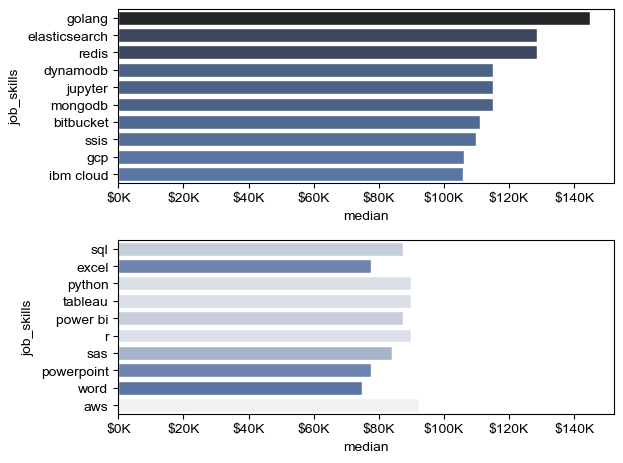

In [17]:
# Filter and clean the Data Analyst jobs in the US
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] =='Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg', 'job_skills'])

# Explode job_skills so each skill is a separate row
df_DA_US = df_DA_US.explode('job_skills')

# Select relevant columns
df_DA_US = df_DA_US[['salary_year_avg', 'job_skills']]

# Group by job_skills and aggregate
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10)


fig, ax = plt.subplots(2,1)

sns.set_theme(style = "ticks")

sns.barplot(data = df_DA_US_top_pay, x = 'median', y=df_DA_US_top_pay.index, ax = ax[0], hue='median', palette='dark:b_r',legend=False)

#df_DA_US_top_pay.sort_values(by='median', ascending=True).plot(kind = 'barh', y='median', ax=ax[0], legend=False, title='Top 10 Paying Skills for Data Analysts in the US')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data = df_DA_skills, x = 'median', y=df_DA_skills.index, ax = ax[1],hue='median', palette='light:b_r', legend=False)

#df_DA_skills.sort_values(by='median', ascending=True).plot(kind = 'barh', y='median', ax=ax[1], legend=False,xlabel= 'Median(USD)', title='Top 10 Most In-Demand Skills for Data Analysts in the US')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()
plt.show()



HISTOGRAM


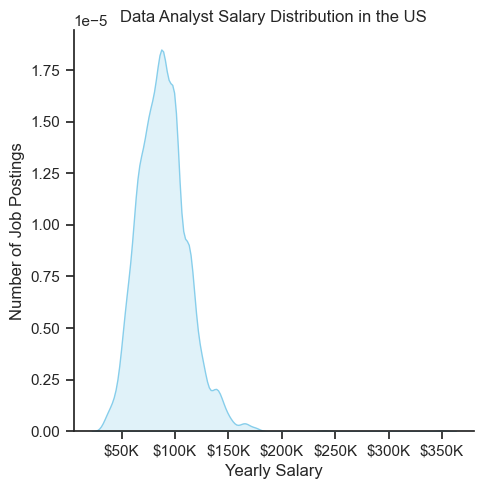

In [23]:
sns.displot(df_DA_US['salary_year_avg'],kind = 'kde', fill = True, color='skyblue')
plt.title('Data Analyst Salary Distribution in the US')
plt.xlabel('Yearly Salary')    
plt.ylabel('Number of Job Postings')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

BOXPLOT

